<style>
.center {
  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;
}
</style>

<div style="text-align: justify; margin:auto;width:90%;">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Logotype_of_Universidade_de_Santiago_de_Compostela.svg/2560px-Logotype_of_Universidade_de_Santiago_de_Compostela.svg.png" width="200px">

# Deep Learning
## P2.2: Recurrent Neural Networks
### Amazon Reviews for Sentiment Analysis

### Students
- Barreiro Domínguez, Víctor Xesús
- Hormazábal Lagos, Maximiliano Manuel

## Introduction

Text classification is an essential task in online sentiment and opinion analysis. The increasing volume of user-generated data across different online platforms makes sentiment analysis a challenging and complex task. 

The objective of this report is to explore the use of deep recurrent neural network techniques to address Kaggle's "Amazon Reviews for Sentiment Analysis" dataset. This dataset consists of millions of Amazon customer reviews and stars assigned by users to each of them. The task is to classify reviews as positive or negative based on the number of stars the user has assigned.

One of the particularities of this dataset is that it has a significant number of reviews in different languages, including Spanish. Specifically, we will work with a reduced version of the dataset, using 25,000 examples for training and 25,000 for testing. Different models of deep recurrent neural networks will be developed, such as LSTMs (Long Short-Term Memory), GRUs (Gated Recurrent Units) and bidirectional neural networks. Each model will be trained and evaluated to determine which is the best option to correctly classify user opinions.

</div>

In [1]:
import time
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import Input, Model
from keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint

# own functions
from dl_utils import *

In [6]:
x_train, y_train, seqLength = readData("amazon/train_small.txt")
x_test, y_test, tmp = readData("amazon/test_small.txt")

del tmp

print(sys.getsizeof(x_train))
print(sys.getsizeof(y_train))
print(sys.getsizeof(x_test))
print(sys.getsizeof(y_test))


#maxFeatures is a hyperparameter
maxFeatures = 5500

x_train_int, y_train, x_test_int, y_test = transformData(x_train, y_train, x_test, y_test, maxFeatures, seqLength)

print("O obxecto")
print(sys.getsizeof(transformData))

del x_train
del x_test
del transformData

200312
200312
200312
200312


2023-04-19 18:48:06.403634: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-19 18:48:06.405835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-19 18:48:06.405901: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-19 18:48:06.406092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

O obxecto
136


<div style="text-align: justify; margin:auto;width:90%;">

## Context

When tackling a natural language processing problem, it is important to take into account the tokenization process. In the case at hand, some aspects are already defined, but we can control the number of features and the sequence size. It is crucial to note that the number of features is a decisive factor in the performance of the model in this problem. For example, we have found that above 5,000 features we do not observe significant improvements in the results. However, for large text corpora, it is recommended to use between 50,000 and 100,000 features, which indicates the variability of the data and the complexity of the problem. This suggests that this problem is likely to be limited to the type of user writing the reviews and the countries they come from, so good generalization to other contexts should not be expected.

As for sequence length, we should be cautious and generous on this problem, since reviews are usually short texts and cutting them further may cause unexpected behavior of the model. In short, a sufficiently large size, such as 256, should be used to allow all samples to be included and, at the same time, not have a serious impact on the computation time, but on the performance of the model.

</div>

# Recurrent Units

## SimpleRNN

### model_0: Basic SimpleRNN for sentiment analysis on Amazon

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 166)]             0         
                                                                 
 embedding (Embedding)       (None, 166, 16)           80000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5184      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 85,505
Trainable params: 85,377
Non-trainable params: 128
_______________________________________________________

2023-04-19 18:02:24.311930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-19 18:02:24.330526: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f61d8021940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-19 18:02:24.330543: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2023-04-19 18:02:24.333169: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-19 18:02:24.366949: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-19 18:02:24.386670: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most on

25/25 [==============================] - ETA: 0s - loss: 0.7077 - accuracy: 0.5467
Epoch 1: val_accuracy improved from -inf to 0.63524, saving model to models/simple.h5
25/25 [==============================] - 4s 113ms/step - loss: 0.7077 - accuracy: 0.5467 - val_loss: 0.6588 - val_accuracy: 0.6352 - lr: 0.0010
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.4827 - accuracy: 0.7758
Epoch 2: val_accuracy improved from 0.63524 to 0.81820, saving model to models/simple.h5
25/25 [==============================] - 2s 99ms/step - loss: 0.4827 - accuracy: 0.7758 - val_loss: 0.5356 - val_accuracy: 0.8182 - lr: 0.0010
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.2950 - accuracy: 0.8800
Epoch 3: val_accuracy improved from 0.81820 to 0.85308, saving model to models/simple.h5
25/25 [==============================] - 2s 95ms/step - loss: 0.2950 - accuracy: 0.8800 - val_loss: 0.4475 - val_accuracy: 0.8531 - lr: 0.0010
Epoch 4/20
25/25 [=================

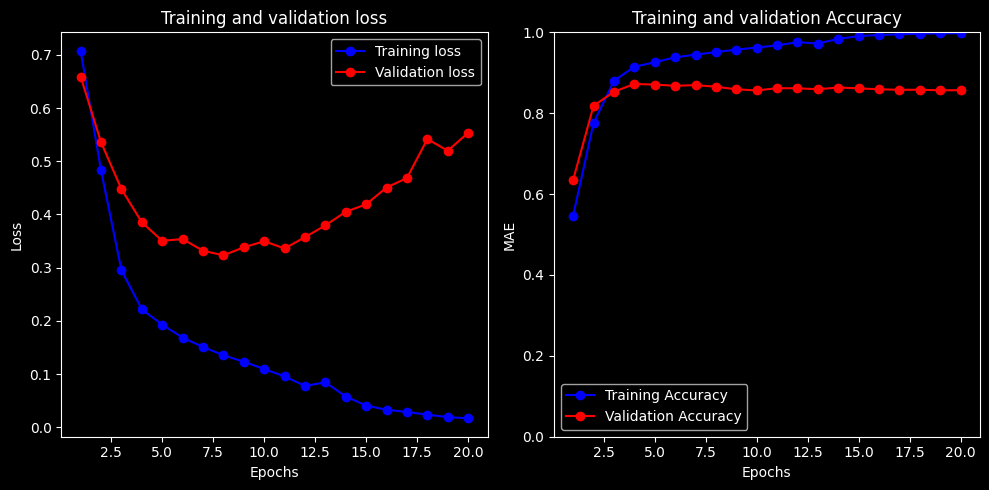

Elapsed time:  35.81513690948486


In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 16, mask_zero=True, input_length=seqLength)(inputs)
x = layers.SimpleRNN(64, return_sequences=False)(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=20, model_name="simple.h5", batch_size=1024, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [12]:
model = keras.models.load_model(dir + "simple.h5")
model.evaluate(x_test_int, y_test)

782/782 [==============================] - 5s 6ms/step - loss: 0.3852 - accuracy: 0.8722


[0.38521212339401245, 0.872160017490387]

### model_1: Improving results with Bidirectional SimpleRNN in sentiment analysis on Amazon

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 166)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 166, 16)           80000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              10368     
 l)                                                              
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 91,009
Trainable params: 90,753
Non-trainable

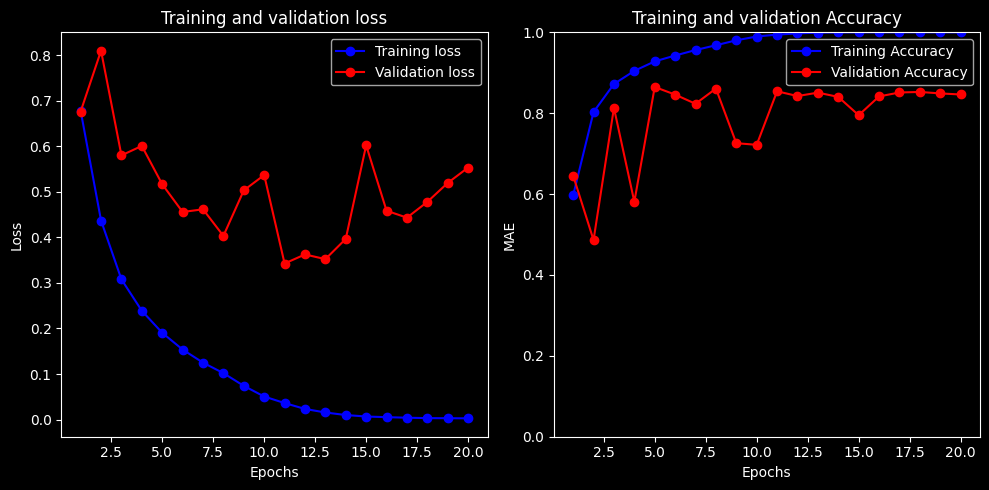

Elapsed time:  54.40829849243164


In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 16, mask_zero=True, input_length=seqLength)(inputs)
x = layers.Bidirectional(layers.SimpleRNN(64, return_sequences=False))(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=20, model_name="simple_bi.h5", batch_size=1024, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [14]:
model = keras.models.load_model(dir + "simple_bi.h5")
model.evaluate(x_test_int, y_test)

782/782 [==============================] - 9s 12ms/step - loss: 0.5164 - accuracy: 0.8649


[0.5163887143135071, 0.8648800253868103]

## GRU

### model_2: Network optimization with GRU in Amazon sentiment analysis

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 166)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 166, 16)           80000     
                                                                 
 gru (GRU)                   (None, 64)                15744     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 96,065
Trainable params: 95,937
Non-trainable params: 128
_____________________________________________________

2023-04-19 18:04:09.874587: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


25/25 [==============================] - ETA: 0s - loss: 0.6621 - accuracy: 0.5944
Epoch 1: val_accuracy improved from -inf to 0.53772, saving model to models/gru.h5
25/25 [==============================] - 4s 70ms/step - loss: 0.6621 - accuracy: 0.5944 - val_loss: 0.6868 - val_accuracy: 0.5377 - lr: 0.0010
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.5002 - accuracy: 0.7534
Epoch 2: val_accuracy did not improve from 0.53772
25/25 [==============================] - 1s 45ms/step - loss: 0.5002 - accuracy: 0.7534 - val_loss: 0.6699 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 3/20
24/25 [===========================>..] - ETA: 0s - loss: 0.3364 - accuracy: 0.8564
Epoch 3: val_accuracy improved from 0.53772 to 0.76196, saving model to models/gru.h5
25/25 [==============================] - 1s 44ms/step - loss: 0.3361 - accuracy: 0.8566 - val_loss: 0.6119 - val_accuracy: 0.7620 - lr: 0.0010
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.2407 - acc

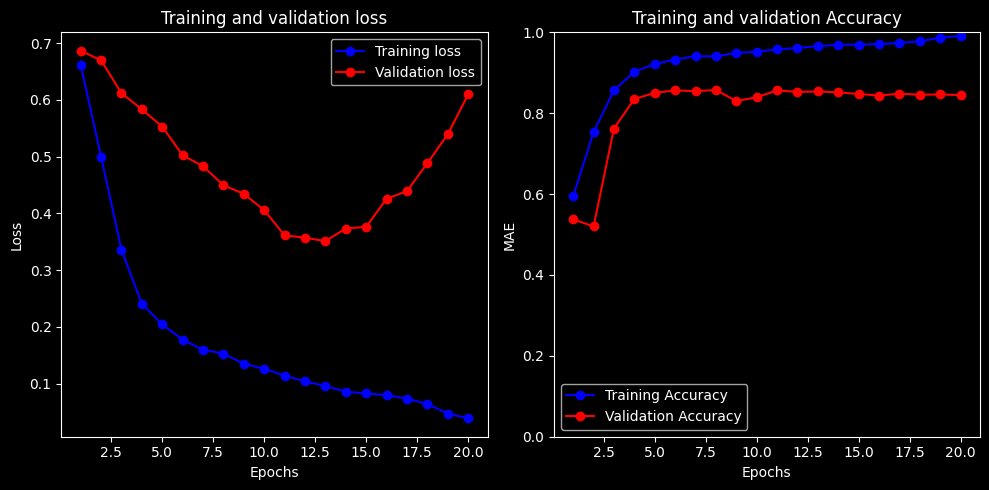

Elapsed time:  15.89973258972168


In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 16, mask_zero=True, input_length=seqLength)(inputs)
x = layers.GRU(64, return_sequences=False)(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=20, model_name="gru.h5", batch_size=1024, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [16]:
model = keras.models.load_model(dir + "gru.h5")
model.evaluate(x_test_int, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4497 - accuracy: 0.8573


[0.44965192675590515, 0.8572800159454346]

### model_3: Improved accuracy with Bidirectional GRU in Amazon sentiment analysis

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 166)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 166, 16)           80000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              31488     
 nal)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 112,129
Trainable params: 111,873
Non-trainab

2023-04-19 18:04:29.218655: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_41/output/_22'


25/25 [==============================] - ETA: 0s - loss: 0.5911 - accuracy: 0.6920
Epoch 1: val_accuracy improved from -inf to 0.78416, saving model to models/gru_bi.h5
25/25 [==============================] - 5s 91ms/step - loss: 0.5911 - accuracy: 0.6920 - val_loss: 0.6740 - val_accuracy: 0.7842 - lr: 0.0010
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.8618
Epoch 2: val_accuracy improved from 0.78416 to 0.85444, saving model to models/gru_bi.h5
25/25 [==============================] - 1s 52ms/step - loss: 0.3267 - accuracy: 0.8618 - val_loss: 0.6317 - val_accuracy: 0.8544 - lr: 0.0010
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.2179 - accuracy: 0.9145
Epoch 3: val_accuracy improved from 0.85444 to 0.87052, saving model to models/gru_bi.h5
25/25 [==============================] - 1s 50ms/step - loss: 0.2179 - accuracy: 0.9145 - val_loss: 0.6019 - val_accuracy: 0.8705 - lr: 0.0010
Epoch 4/20
25/25 [==================

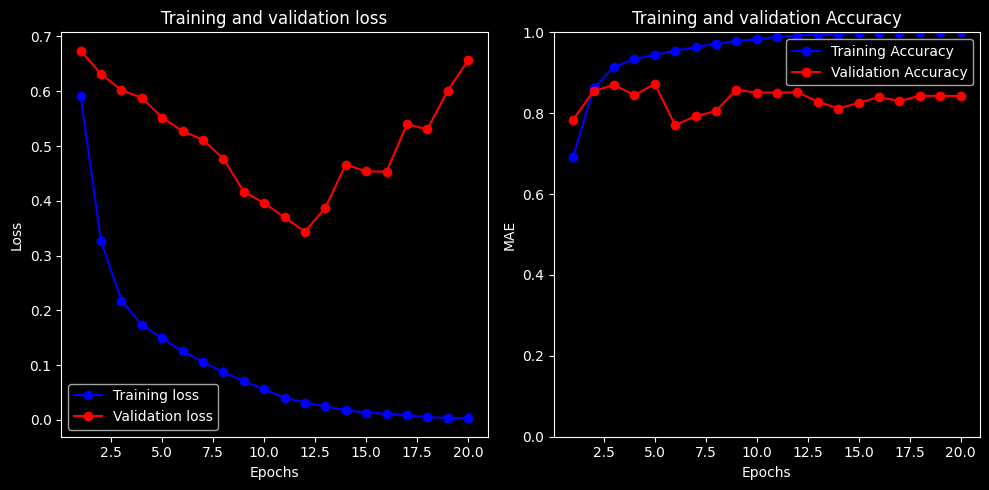

Elapsed time:  20.982495546340942


In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 16, mask_zero=True, input_length=seqLength)(inputs)
x = layers.Bidirectional(layers.GRU(64, return_sequences=False))(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=20, model_name="gru_bi.h5", batch_size=1024, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [18]:
model = keras.models.load_model(dir + "gru_bi.h5")
model.evaluate(x_test_int, y_test)

782/782 [==============================] - 4s 3ms/step - loss: 0.5516 - accuracy: 0.8724


[0.551629364490509, 0.8723999857902527]

## LSTM

### model_4: Basic LSTM network for Amazon sentiment analysis

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 166)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 166, 16)           80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 101,057
Trainable params: 100,929
Non-trainable params: 128
___________________________________________________

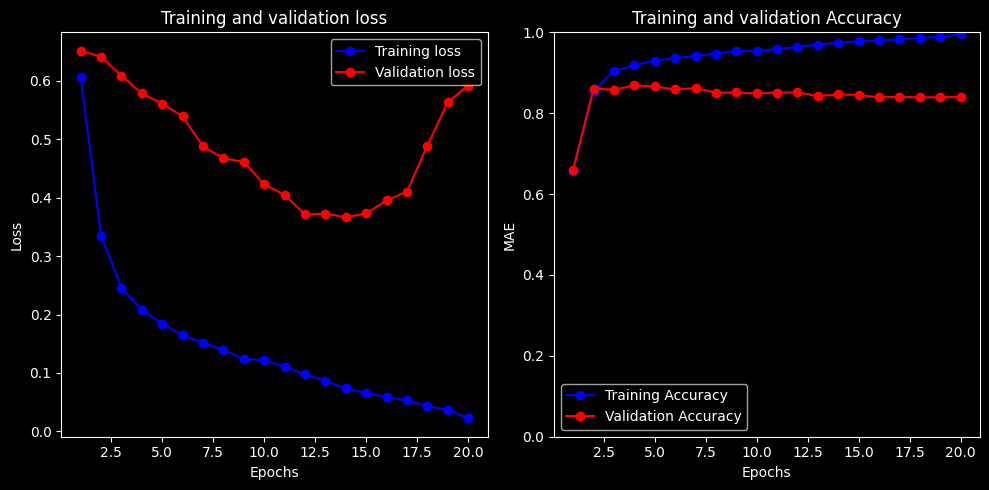

Elapsed time:  15.766591787338257


In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 16, mask_zero=True, input_length=seqLength)(inputs)
x = layers.LSTM(64, return_sequences=False)(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=20, model_name="lstm.h5", batch_size=1024, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [20]:
model = keras.models.load_model(dir + "lstm.h5")
model.evaluate(x_test_int, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.5788 - accuracy: 0.8687


[0.5788054466247559, 0.8686800003051758]

### model_5: Improved accuracy with Bidirectional LSTM in Amazon sentiment analysis

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 166)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 166, 16)           80000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              41472     
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 122,113
Trainable params: 121,857
Non-trainab

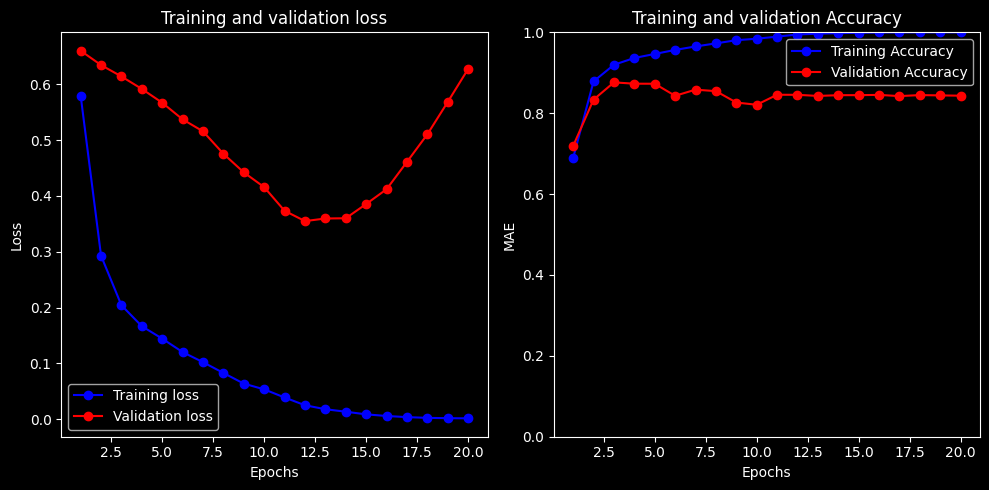

Elapsed time:  22.130324840545654


In [21]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 16, mask_zero=True, input_length=seqLength)(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=False))(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=20, model_name="lstm_bi.h5", batch_size=1024, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [22]:
model = keras.models.load_model(dir + "lstm_bi.h5")
model.evaluate(x_test_int, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.6140 - accuracy: 0.8762


[0.614045262336731, 0.8762400150299072]

# Trying to improve the metrics
### model_6: Network optimization for Amazon sentiment analysis with multiple layers Bidirectional GRU

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 166)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 166, 128)          704000    
                                                                 
 batch_normalization_7 (Batc  (None, 166, 128)         512       
 hNormalization)                                                 
                                                                 
 bidirectional_3 (Bidirectio  (None, 166, 1024)        1972224   
 nal)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 166, 1024)        4096      
 hNormalization)                                                 
                                                           

2023-04-19 18:48:44.414353: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT8
    }
  }
}

	while inferring type of node 'cond_43/output/_22'
2023-04-19 18:48:44.866746: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-04-19 18:48:45.775788: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-19 18:48:45.777527: I tensorflow/compiler/xla/service

25/25 [==============================] - ETA: 0s - loss: 0.5844 - accuracy: 0.6955
Epoch 1: val_accuracy improved from -inf to 0.48628, saving model to models/gru_bi_a0.h5
25/25 [==============================] - 18s 337ms/step - loss: 0.5844 - accuracy: 0.6955 - val_loss: 0.6889 - val_accuracy: 0.4863 - lr: 0.0010
Epoch 2/50
25/25 [==============================] - ETA: 0s - loss: 0.3149 - accuracy: 0.8714
Epoch 2: val_accuracy did not improve from 0.48628
25/25 [==============================] - 6s 229ms/step - loss: 0.3149 - accuracy: 0.8714 - val_loss: 0.7445 - val_accuracy: 0.4863 - lr: 0.0010
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 0.1856 - accuracy: 0.9324
Epoch 3: val_accuracy did not improve from 0.48628
25/25 [==============================] - 6s 226ms/step - loss: 0.1856 - accuracy: 0.9324 - val_loss: 0.8110 - val_accuracy: 0.4863 - lr: 0.0010
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9694
Epoch 4: va

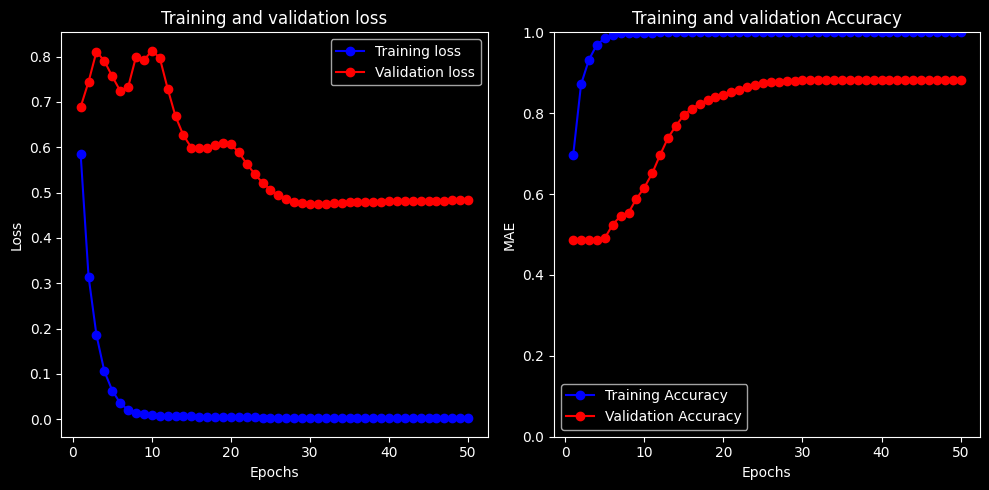

Elapsed time:  275.1228439807892


In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 128, mask_zero=True)(inputs)
x = keras.layers.BatchNormalization()(x)
x = layers.Bidirectional(layers.GRU(512, return_sequences=True))(x)
x = keras.layers.BatchNormalization()(x)
x = layers.Bidirectional(layers.GRU(128, return_sequences=True))(x)
x = keras.layers.BatchNormalization()(x)
x = layers.Bidirectional(layers.GRU(16, return_sequences=False))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(32, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(8, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=50, model_name="gru_bi_a0.h5", batch_size=1024, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [11]:
model = keras.models.load_model(dir + "gru_bi_a0.h5")
results = model.evaluate(x_test_int, y_test)
print(results)

782/782 [==============================] - 11s 11ms/step - loss: 0.4786 - accuracy: 0.8828
[0.4785896837711334, 0.8827999830245972]


### model_7: Additional network tuning for Amazon sentiment analysis with additional Dense layer

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 166)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 166, 128)          704000    
                                                                 
 batch_normalization_25 (Bat  (None, 166, 128)         512       
 chNormalization)                                                
                                                                 
 bidirectional_8 (Bidirectio  (None, 166, 1024)        1972224   
 nal)                                                            
                                                                 
 batch_normalization_26 (Bat  (None, 166, 1024)        4096      
 chNormalization)                                                
                                                          

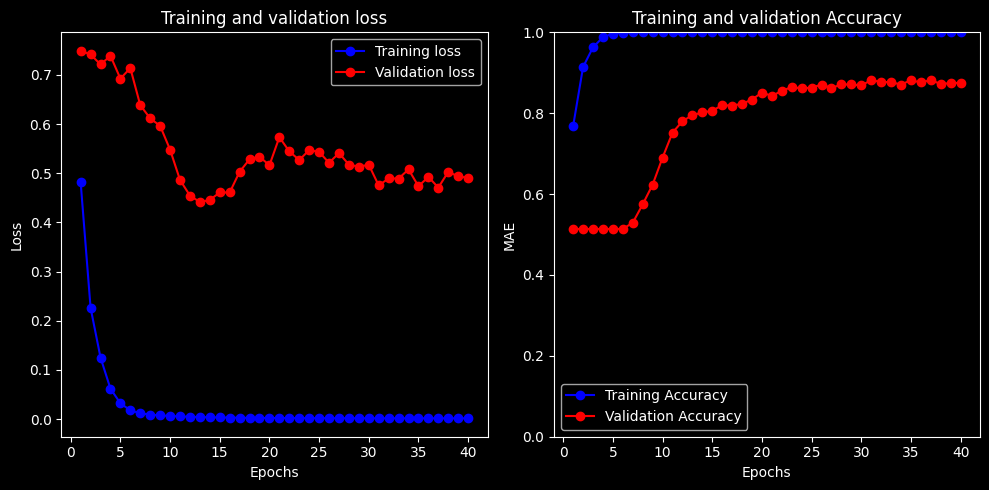

Elapsed time:  191.2750096321106


In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 128, mask_zero=True, input_length=256)(inputs)
x = keras.layers.BatchNormalization()(x)
x = layers.Bidirectional(layers.GRU(512, return_sequences=True))(x)
x = keras.layers.BatchNormalization()(x)
x = layers.Bidirectional(layers.GRU(256, return_sequences=False))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(32, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(8, activation="sigmoid")(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=40, model_name="gru_bi_a.h5", batch_size=1024, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [32]:
model = keras.models.load_model(dir + "gru_bi_a.h5")
results = model.evaluate(x_test_int, y_test)
print(results)

782/782 [==============================] - 9s 9ms/step - loss: 0.4556 - accuracy: 0.8867
[0.4556419849395752, 0.8867200016975403]


<div style="text-align: justify; margin:auto;width:90%;">

Regarding the models themselves, it is necessary to distinguish three stages of our pipeline. The first one is Embedding, which seeks to obtain the best representation for each token in the vector space defined by the proposed parameters. Specifically, this is a space of the form sequence_length x embedding_size. From this layer, a vector is obtained for each token entered in the model input. It is important to use an embedding size large enough to represent the variability of our corpus. If the embedding size is too small, even if we try to increase the complexity of the rest of the model, we will not be able to improve its behavior, since we will be losing too much information in this step.

The second stage is the recurrent layer, where there are three issues of particular impact on our problem. First, the type of recurrent units must be considered, since unlike other Deep Learning paradigms, such as convolutions, recurrent units are not equivalent to a set of stacked dense layers. Moreover, the gates they implement exhibit different behaviors that may be more or less suitable to our problem. In this case, since we are dealing with text, LSTMs or GRUs are expected to show the best behavior, being clearly more complex than SimpleRNNs. Secondly, the number of units to be introduced must be taken into account, representing the steps involved in processing the text. A very low number will be insufficient to capture the different meaningful blocks within the processed text fragment, while a very high number will not bring an improvement in performance and may be an obstacle in the training process. This number is highly conditioned by the sequence size used and, ultimately, by the size of the text fragments being processed, since more stages will be needed if the fragment is longer. In this case, reasonably good behavior has been observed from low values, such as 6, since the fragments are small, and slight improvements have been observed up to sizes of 16 or 32. It is important to note that other aspects, such as the embedding size or the number of features, also play important roles and can contribute to change the behavior of this stage. Also, since this is a relatively small problem, relatively good behavior could be observed when adding more complexity in other elements of the model, although these decisions are not justified with a proper understanding of the model.

On the other hand, it is important to take into account the randomness characteristic of the training process. Sometimes, the initial model or after a single epoch may show extraordinarily good behavior without a priori justification, and small changes in the seed make similar overall behavior not repeatable. Although it is necessary to try to understand why these cases arise, they should not be taken as valid conclusions as they are purely anecdotal. In this regard, it is worth noting that, on our problem, no relevant improvement has been perceived by introducing several stacked recurrent layers.

</div>

# Small model

### model_8: Network simplification for Amazon sentiment analysis with Embedding and low-dimensionality GRU.

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 166)]             0         
                                                                 
 embedding_23 (Embedding)    (None, 166, 4)            22000     
                                                                 
 batch_normalization_55 (Bat  (None, 166, 4)           16        
 chNormalization)                                                
                                                                 
 gru_19 (GRU)                (None, 8)                 336       
                                                                 
 batch_normalization_56 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_36 (Dense)            (None, 1)                 9  

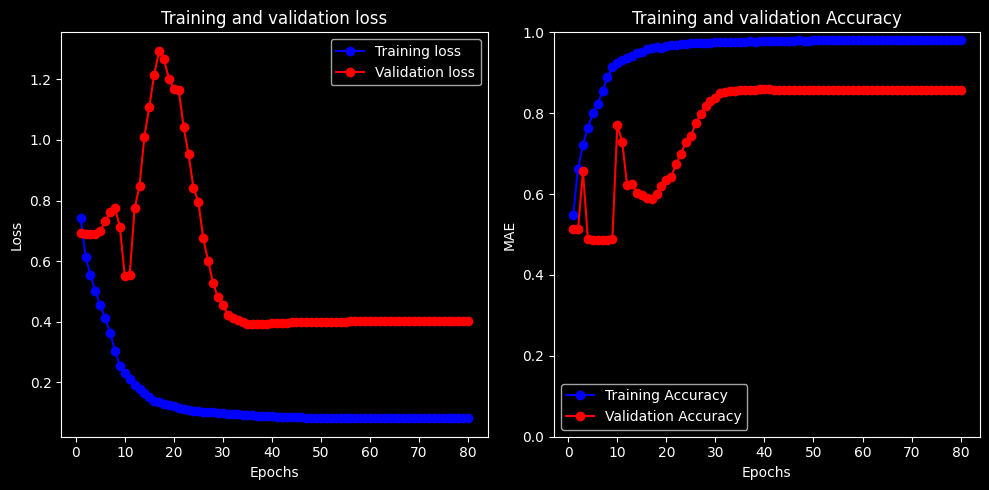

Elapsed time:  43.26756191253662


In [69]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 4, mask_zero=True, input_length=256)(inputs)
x = keras.layers.BatchNormalization()(x)
x = layers.GRU(8, return_sequences=False)(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=80, model_name="gru_bi_r.h5", batch_size=1024, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [70]:
model = keras.models.load_model(dir + "gru_bi_r.h5")
results = model.evaluate(x_test_int, y_test)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.3918 - accuracy: 0.8595
[0.39175620675086975, 0.8594800233840942]


# El impacto de los hiperparámetros

### model_9: Measuring the impact of batch size

Batch size muy muy grande

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 166)]             0         
                                                                 
 embedding_24 (Embedding)    (None, 166, 64)           352000    
                                                                 
 batch_normalization_57 (Bat  (None, 166, 64)          256       
 chNormalization)                                                
                                                                 
 bidirectional_15 (Bidirecti  (None, 512)              494592    
 onal)                                                           
                                                                 
 batch_normalization_58 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                          

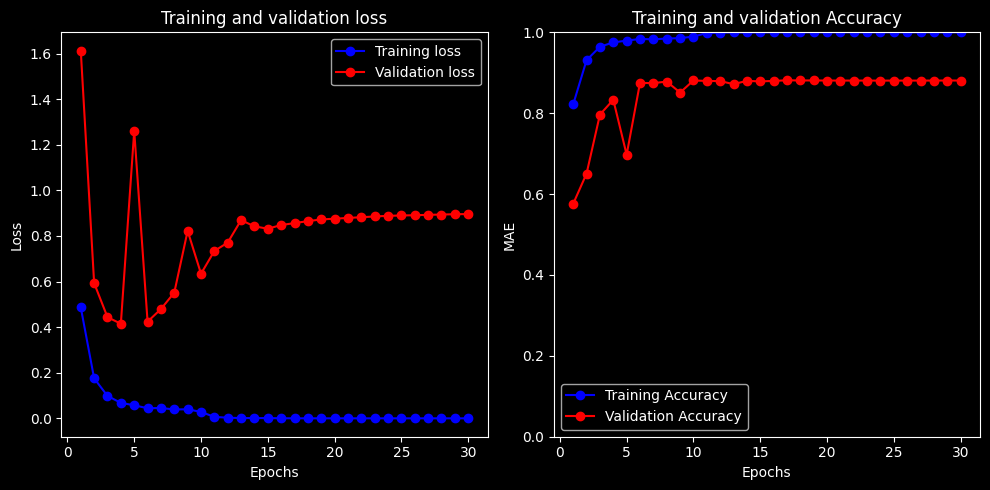

Elapsed time:  57.49917149543762


In [71]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 64, mask_zero=True, input_length=seqLength)(inputs)
x = keras.layers.BatchNormalization()(x)
x = layers.Bidirectional(layers.GRU(256, return_sequences=False))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=30, model_name="gru_bi_a.h5", batch_size=512, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [72]:
model = keras.models.load_model(dir + "lstm_bi_a.h5")
model.evaluate(x_test_int, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.7453 - accuracy: 0.7994


[0.7452947497367859, 0.7993999719619751]

### model_10: Measuring the impact of batch size 2

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 166)]             0         
                                                                 
 embedding_25 (Embedding)    (None, 166, 64)           352000    
                                                                 
 batch_normalization_61 (Bat  (None, 166, 64)          256       
 chNormalization)                                                
                                                                 
 bidirectional_16 (Bidirecti  (None, 512)              494592    
 onal)                                                           
                                                                 
 batch_normalization_62 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                          

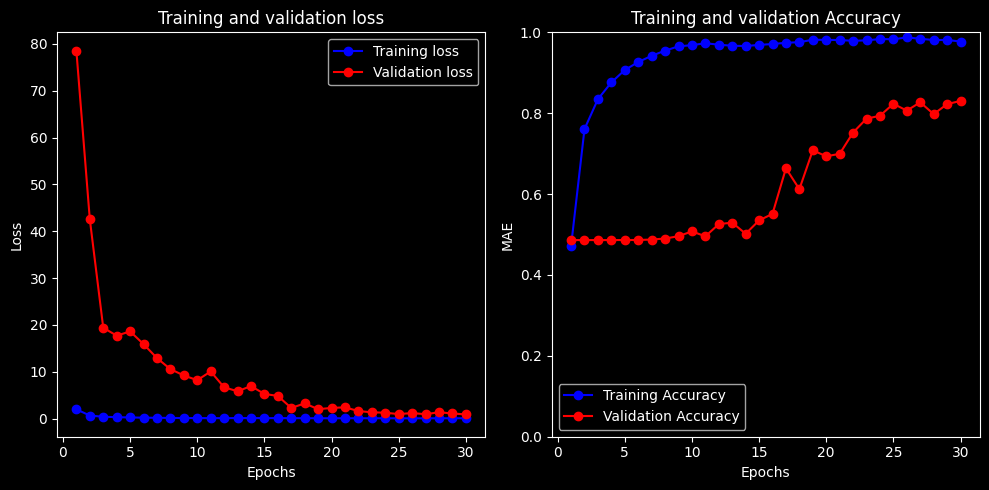

Elapsed time:  30.094652891159058


In [73]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

np.random.seed(423423)
tf.random.set_seed(1232413)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00000000000000000000001, verbose=1)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, ))
x = layers.Embedding(maxFeatures, 64, mask_zero=True, input_length=seqLength)(inputs)
x = keras.layers.BatchNormalization()(x)
x = layers.Bidirectional(layers.GRU(256, return_sequences=False))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.04)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

result = fitModel(model, x_train_int, y_train, (x_test_int, y_test), num_epochs=30, model_name="gru_bi_a.h5", batch_size=4096, callbacks=[reduce_lr])

end_time = time.time()
print("Elapsed time: ", end_time - start_time)  

In [74]:
model = keras.models.load_model(dir + "lstm_bi_a.h5")
model.evaluate(x_test_int, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.7453 - accuracy: 0.7994


[0.7452947497367859, 0.7993999719619751]

<div style="text-align: justify; margin:auto;width:90%;">

## General conclusions

In general, when tackling a text classification problem, the tokenization process is crucial to obtain good results. In this case, it is important to consider both the number of features and the sequence length to adjust them to the size of the text fragments we want to classify. These aspects are sensitive to both the problem and the model to be applied.

### Initial models

In general, all the architectures presented in the text use an Embedding layer as an initial step, followed by one or more recurrent layers, followed by a dense layer before output. In addition, all architectures use Batch Normalization to improve network training. We can see that architectures using bidirectional recurrent layers (model_1 and model_3) tend to perform better than architectures with simple recurrent layers (model_0 and model_2). In addition, architectures with LSTM layers (model_4 and model_5) tend to have slightly lower results than architectures with GRU layers (model_1 and model_3).
All architectures have an accuracy above 85%, indicating that they are all capable of performing the sentiment classification task effectively. The architecture with the highest accuracy is model_5, which uses a bidirectional LSTM layer that seems to be a good choice as it has a robust and reasonably good accuracy, with an architecture that is not too complex. However, in general, all the architectures presented have solid results.

### Increased complexity to seek better performance.

In this new set of architectures, we can see that both architectures have a more complex and deeper structure than previous architectures. In general, they use a larger number of recurrent layers, a larger number of units and use deeper dense layers before the output.
The final metrics reach an accuracy of over 88%, indicating an improvement over previous architectures. The architecture with the highest accuracy is model_7, which uses a bidirectional GRU layer. It is therefore possible to infer that the complexity and depth of the recurrent neural networks have a significant impact on model performance. However, we must also keep in mind that these architectures are more complex and often slower.

The use of bidirectional recurrent neural network layers such as GRU and LSTM with batch normalization, produces better results than simple layers, even, several recurrent layers and the use of bidirectional and dense produces a significant increase in performance, compared to simpler architectures. In particular, model_7 obtains the best result in terms of binary_crossentropy and accuracy, followed by model_6 and then by model_5. All of them use bidirectional layers with GRU and LSTM and several dense layers with batch normalization.

In terms of network design, it is essential to include an Embedding layer and a Recurrent layer. In the Embedding layer, the size chosen has a significant impact on the computational complexity and on the results, since it is in charge of representing the semantic distance between tokens. It is important to take normalization into account, as this layer tends to overfit. As for the recurrent stage, the best results have been obtained with GRU units in a bidirectional way, and for this problem, good results have been obtained with a small number of 16 units. However, one should be cautious if one wishes to reduce the number of units, as important contextual information could be lost.

Regarding the dense layers before the output, it has been observed that they are not necessary to achieve the objective of this work, obtaining an accuracy of 85.6% in a repeatable manner. To improve the results, it has been seen that it is necessary to significantly increase the overall complexity of the network, increasing the embedding size, the number of recurrent units, among others. With this strategy, an accuracy of 88.6% has been achieved. It is important to note that a tendency to overfitting has been observed if the dense layers are increased and not the previous stages.

### Simplest architecture

Model_8 is the simplest and obtains lower results than the more complex models. Despite this a simpler architecture such as model_8 can be advantageous in terms of computational cost and training time, however, this leads to a decrease in the accuracy of the results that must be taken into account since a more complex architecture such as model_7, can significantly improve the performance of the network, but at the expense of higher complexity and computational cost, so it is necessary to seek a balance between the accuracy sought and the speed needed in the particular problem.
In summary, the choice of a recurrent neural network architecture depends on the specific problem being addressed, as well as on the limitations of computational resources and training time. In general, the use of bidirectional recurrent layers with batch normalization and several dense layers can significantly improve network performance compared to simple layers. However, a decrease in the simplicity of the architecture can lead to similar results with lower computational and training time cost.

</div>